# Sentiment Analysis of Elon Musk's Tweets
This project focuses on performing sentiment analysis of tweets posted by Elon Musk, one of the most influential entrepreneurs and visionaries of our time. Through tweet processing and analysis, we aim to gain valuable insights into the sentiments expressed in his tweets and their impact on public perception.


Student: Pablo Uriarte A01595101
 
## Notebook Contents:

### 1. Data preview

    -This section provides an overview of the dataset, showcasing a glimpse of the data, its structure, and relevant information such as column names and data types.

### 2. Data Preparation: 

    -This section focuses on cleaning and preprocessing the tweets. It includes code and resources for removing mentions, URLs, and unwanted symbols, ensuring the data is in a suitable format for analysis. 
    
    -Additionally, feature engineering techniques may be employed to derive meaningful insights from the data.

    
### 3. Exploratory Analysis:

    -In this section, the data is analyzed to gain a deeper understanding of its characteristics and patterns. Various statistical and visual techniques are applied to explore the distribution, relationships, and trends within the data. 
    
    -This analysis helps identify key insights and potential correlations.

### 4. Sentiment Analysis: 

    -Here, you will find the code for conducting sentiment analysis of the tweets using natural language processing techniques. This will enable us to classify the tweets as positive, negative, or neutral.

### 5. Results and Insights visualizations: 

    -In this section, interactive visualizations of the sentiment analysis results are provided. This will help us understand trends and changes in sentiment over time.

### Some Q&A Research questions:

##### Whats Elon Musk main emotion perceived in his twits?

He'smainly seems to be a joyful twitter user, we can add to our agument his preference on using the laughin face emoji. But, also we can notice that he can get easly perturbed in stressful events.

##### How does the frequency of labels change over time?

He got joyful and joyful

#####  Are there any specific events or periods that coincide with a significant change in label frequency?

But, also we can notice that he can get easly perturbed in stressful events. Take a look to the "relationship with Grimes" event on the overview plot.

##### Which accounts he interacts the most?

Elon seem to be a very proficient business man, eventhough hes know for his problematic interactions, the data suggest that he spends more of his time discusing his companies.


## 1. Data preview

    -Import the necessary python libriaries
    -General oversee of what the data looks like (# Columns, Data types, NaN check)

In [1]:
# Libraries
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for statistical data visualization

import nltk  # Natural Language Toolkit library
from nltk.stem import WordNetLemmatizer  # Lemmatization library
from nltk.corpus import wordnet  # Lexical database for English language
from nltk import pos_tag, word_tokenize  # Functions for part-of-speech tagging and tokenization

from nltk.stem.snowball import SnowballStemmer  # Snowball Stemming Algorithm library
from nltk.tokenize import word_tokenize  # Function for tokenization
from nltk.corpus import stopwords  # Stopwords corpus
from nltk import ngrams  # Functions for creating n-grams
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('averaged_perceptron_tagger')  # Downloading the pre-trained model for part-of-speech tagging
nltk.download('punkt')  # Downloading the tokenizer models
nltk.download('wordnet')  # Downloading WordNet lexical database
nltk.download('stopwords')  # Downloading the stopwords corpus

import re  # Regular expression operations library
import random  # Library for generating random numbers

from collections import Counter  # Library for counting elements in a list
from wordcloud import WordCloud  # Library for creating word clouds

import emoji  # Library for working with emojis


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/puriarte/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/puriarte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/puriarte/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/puriarte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from textblob import TextBlob

import transformers
from transformers import pipeline

/home/puriarte/TC5031/tc5031/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
bd_tw = pd.read_csv('Data/elonmusk.csv')

In [4]:
#This is a subset of the first dataframe that takes into account the twits with high Subjectivity score
#subset_bd_tw = pd.read_csv('Data/subset_bd_tw.csv') #sentiment labeled data

In [5]:
bd_tw.head()

,Datetime,Tweet Id,Text,Username
0,2023-05-29 22:22:12+00:00,1663309794659168256,@mattyglesias Now answer the question,elonmusk
1,2023-05-29 22:21:43+00:00,1663309674194649089,@mattyglesias Insufferable numbskull,elonmusk
2,2023-05-29 21:33:29+00:00,1663297534062673920,@EndWokeness Yes,elonmusk
3,2023-05-29 20:04:12+00:00,1663275065696239653,@SethDillon 🤣,elonmusk
4,2023-05-29 19:44:54+00:00,1663270209598246912,@TeslaOwnersEBay @stevenmarkryan @WholeMarsBlo...,elonmusk


In [6]:
bd_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  23501 non-null  object
 1   Tweet Id  23501 non-null  int64 
 2   Text      23501 non-null  object
 3   Username  23501 non-null  object
dtypes: int64(1), object(3)
memory usage: 734.5+ KB


In [7]:
# Checking for NaN just in case.
nan_check = bd_tw.isna().any()
nan_check

Datetime    False
Tweet Id    False
Text        False
Username    False
dtype: bool

#### Notes:
    -No NaN found in any column
    -Interest Columns are object dtypes

# 2. Data Preparation:

We'll do some basic cleaning and a little feature engineering as well.

    -1. Standarize column names turn to lower case.
    -2. We'll split the "datetime" column so we can be better at splitting periods of time and hours of the day later in the analysis
    -3. Columns "tweet_id" & "username" not really useful so we can drop them
    
    
    
Or columns details:

    -"text" Raw twits text date scraped directly from twitter
    
    -"preprocessed_text" clean text data, no stop words, no emojis, no usernames,no non-alphabetical simbols tokenized Text Data (for sentiment analysis)
    
    -"lemmatized_text" preprocessed_text + lemmatized Text Data




In [8]:
##1 Change column names to lower case and remove spaces
bd_tw.columns = [col.lower().replace(' ', '_') for col in bd_tw.columns]

In [9]:
##2 Convert the "datetime" column to datetime format
bd_tw['datetime'] = pd.to_datetime(bd_tw['datetime'])

## Create new 'date' column
bd_tw['date'] = bd_tw['datetime'].dt.date

## Create new 'hour' column
bd_tw['hour'] = bd_tw['datetime'].dt.hour

In [10]:
# Convert 'date' column to datetime object
bd_tw['date'] = pd.to_datetime(bd_tw['date'])

In [11]:
##3 Drop unuseful columns
bd_tw.drop(columns=['tweet_id', 'username'], inplace=True)
bd_tw.drop(columns=['datetime'], inplace=True)

#Making every letter to be lower case
bd_tw['text'] = bd_tw['text'].str.lower()

In [12]:
# Reorder the DataFrame
bd_tw = bd_tw[['date', 'hour', 'text']]

### 2.1 Text Data Preprocessing

#### For our NLP work we need to do some preprocessing of out data and feature generation out of the text column data.

    -1 Create a new text column free of usernames, emojis 
    -2 Remove stop words. 
    -3 Tokenize the text
    -4 Remove URLs
    -5 Remove non-alphabetic characters
    -6 Lemmatize the text


#### Notes:
   
    -Final working column will be "lemmatized_text"
    -I kept the original "text" column and the "proprocessed text"(which keeps non-alphabetic characters just in case we can use those later)
    
    

In [13]:
##(Column:lemmatized_text )

#1 Create a new text column free of usernames, emojis
#2 Remove stop words 
#3 Tokenize the text

# Define the set of stop words
stop_words = set(stopwords.words("english") + ["im", "amp", "lol", "one", "today", "gon", "na", "gonna", "wan", "wanna"])

def preprocess_text_sw(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove emojis
    text = emoji.demojize(text)
    text = re.sub(r':[a-zA-Z_&]+:', '', text)

    # Tokenize the words
    word_tokens = word_tokenize(text)

    # Filter out the stop words
    filtered_text = [word for word in word_tokens if not word in stop_words]

    return " ".join(filtered_text)

# Apply the preprocessing to the text column
bd_tw['preprocessed_text'] = bd_tw['text'].apply(preprocess_text_sw)


In [14]:
#4 Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'(https?|www)[\s:/.A-Za-z0-9]*|//t\.co/\S*')
    return url_pattern.sub(r'', text)

# Apply the URL removal to the preprocessed_text column
bd_tw['preprocessed_text'] = bd_tw['preprocessed_text'].apply(remove_urls)




In [15]:
## Out of column 'preprocessed_text'

#5 Remove non-alphabetic characters for columns: 'preprocessed_text' and 'lemmatized_text'
def preprocess_lemmatize_text(text):
    # Replace underscores with spaces
    text = re.sub(r'_', ' ', text)
    
    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

# Apply the remove non-alphabetic function the preprocessing to the preprocessed_text column 
bd_tw['preprocessed_text'] = bd_tw['preprocessed_text'].apply(preprocess_lemmatize_text)

# Apply the remove non-alphabetic function the preprocessing to the preprocessed_text column 
# and store the result in a new column for lemmatization
bd_tw['lemmatized_text'] = bd_tw['preprocessed_text'].apply(preprocess_lemmatize_text)


In [16]:
#6 Lemmatize the text to Column:lemmatized_text 

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# This function converts nltk pos-tags to WordNet pos-tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    nltk_pos_tagged = pos_tag(word_tokenize(text))
    wordnet_pos_tagged = list(map(lambda x: (x[0], get_wordnet_pos(x[1])), nltk_pos_tagged))
    lemmatized_text = list(map(lambda x: lemmatizer.lemmatize(x[0], pos=x[1]), wordnet_pos_tagged))
    return " ".join(lemmatized_text)

# Apply the lemmatization to the lemmatized_text column
bd_tw['lemmatized_text'] = bd_tw['lemmatized_text'].apply(lemmatize_text)

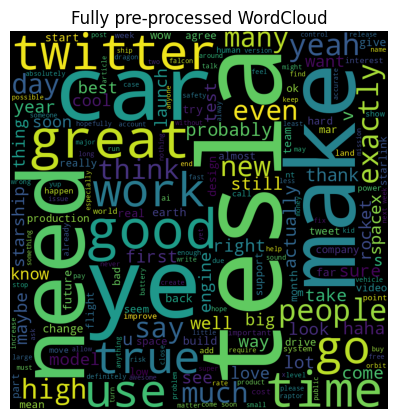

In [36]:
#FIRST WORD CLOUD (Column:lemmatized_text )

#Concatenate all the preprocessed text together
all_text = ' '.join(bd_tw['lemmatized_text'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(all_text)

# Plot the word cloud
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Fully pre-processed WordCloud")
plt.tight_layout(pad = 0)

plt.show()


With the word cloud, we make sure that the text data was properly preprocessed.

### Feature engineering


#### We'll also test some new columns.

    -Creat a new column with the @users tagged in the twits
    -Well use named entity recognition to see what other information we can get
    
    -1. Add a new column for text length
    -2. Extract Emojis from the raw text column using a regular expression to match any emoji
    -3. Extract interactions with other users, creating a new column called "usernames".
    
    
   #### Notas:
   
       -I need to remove duplicates in my emoji column

In [18]:
bd_tw.head()

,date,hour,text,preprocessed_text,lemmatized_text
0,2023-05-29,22,@mattyglesias now answer the question,answer question,answer question
1,2023-05-29,22,@mattyglesias insufferable numbskull,insufferable numbskull,insufferable numbskull
2,2023-05-29,21,@endwokeness yes,yes,yes
3,2023-05-29,20,@sethdillon 🤣,,
4,2023-05-29,19,@teslaownersebay @stevenmarkryan @wholemarsblo...,later year definitely needs happen,later year definitely need happen


In [19]:
# 1. Add a new column for text length
bd_tw.loc[:, 'text_length'] = bd_tw['text'].str.len()

In [38]:
#2. Extract Emojis from the raw text column using a regular expression to match any emoji
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Define a function that extracts unique emojis from a string
def extract_unique_emojis(text):
    emojis = re.findall(emoji_pattern, text)
    unique_emojis = list(set(emojis))
    return ', '.join(unique_emojis)

# Apply the function to the 'text' column and assign the result to the 'emoji' column
bd_tw['emoji'] = bd_tw['text'].apply(extract_unique_emojis)



In [21]:
#3. Creating a new column called "usernames"
bd_tw['usernames'] = bd_tw['text'].str.extractall(r'(@\w+)')[0].groupby(level=0).apply(','.join)


#### Usernames

I created a subdataset with data from usernames to see relations

In [40]:
bd_tw.head()

,date,text,text_length,preprocessed_text,lemmatized_text,usernames,emoji,hour,month,year
0,2023-05-29,@mattyglesias now answer the question,37,answer question,answer question,@mattyglesias,,22,5,2023
1,2023-05-29,@mattyglesias insufferable numbskull,36,insufferable numbskull,insufferable numbskull,@mattyglesias,,22,5,2023
2,2023-05-29,@endwokeness yes,16,yes,yes,@endwokeness,,21,5,2023
3,2023-05-29,@sethdillon 🤣,13,,,@sethdillon,🤣,20,5,2023
4,2023-05-29,@teslaownersebay @stevenmarkryan @wholemarsblo...,107,later year definitely needs happen,later year definitely need happen,"@teslaownersebay,@stevenmarkryan,@wholemarsblo...",,19,5,2023


In [39]:
#This is a subset of the first dataframe that takes into account the twits with high Subjectivity score
subset_bd_tw_1 = pd.read_csv('Data/subset_bd_tw.csv') #sentiment labeled data

subset_bd_tw_1.head(20)

,date,text,text_length,preprocessed_text,lemmatized_text,usernames,emoji,hour,subjectivity_score,label,score
0,2023-05-29,@krassenstein this is pretty cool,33,pretty cool,pretty cool,@krassenstein,NaN,19,0.825000,joy,0.997732
1,2023-05-29,@stevenmarkryan @wholemarsblog heard diablo iv...,94,heard diablo iv might good remake system shoc...,heard diablo iv might good remake system shock...,"@stevenmarkryan,@wholemarsblog",NaN,19,0.600000,joy,0.946978
2,2023-05-29,@joeys_lady @stevenmarkryan @wholemarsblog true,47,true,true,"@joeys_lady,@stevenmarkryan,@wholemarsblog",NaN,18,0.650000,joy,0.976937
3,2023-05-29,scrolling through tweets while watching mini v...,72,scrolling tweets watching mini video pic pic ...,scroll tweet watch mini video pic pic great,NaN,NaN,18,0.750000,joy,0.863191
4,2023-05-29,@cmdr_hadfield the china space program is far ...,84,china space program far advanced people realize,china space program far advanced people realize,@cmdr_hadfield,NaN,17,0.800000,joy,0.977179
5,2023-05-29,@cremieuxrecueil wow,20,wow,wow,@cremieuxrecueil,NaN,16,1.000000,surprise,0.764474
6,2023-05-29,@monitoringbias true,20,true,true,@monitoringbias,NaN,15,0.650000,joy,0.976937
7,2023-05-29,@libertycappy sounds true,25,sounds true,sound true,@libertycappy,NaN,5,0.525000,joy,0.996970
8,2023-05-29,@scobleizer i realize the implicit irony in sa...,96,realize implicit irony saying highest paid f...,realize implicit irony say high paid far,@scobleizer,NaN,1,0.770000,joy,0.935485
9,2023-05-28,"@historyinmemes he was a bamf for sure, but “b...",87,bamf sure bull moose party great name,bamf sure bull moose party great name,@historyinmemes,NaN,9,0.819444,joy,0.990955


In [23]:
# Create an empty list to store the extracted data
extracted_data = []

# Iterate over each row in the original DataFrame
for index, row in subset_bd_tw_1.iterrows():
    # Convert the value in the "usernames" column to a string
    usernames_str = str(row['usernames'])
    
    # Extract the usernames from the "usernames" column
    usernames = re.findall(r'@(\w+)', usernames_str)
    
    # Append the extracted data to the list
    for username in usernames:
        extracted_data.append({
            'username': username,
            'label': row['label'],
            'lemmatized_text': row['lemmatized_text'],
            'date': row['date']
        })

# Create a new DataFrame from the extracted data
username_df = pd.DataFrame(extracted_data)


In [24]:
username_df.head()

,username,label,lemmatized_text,date
0,krassenstein,joy,pretty cool,2023-05-29
1,stevenmarkryan,joy,heard diablo iv might good remake system shock...,2023-05-29
2,wholemarsblog,joy,heard diablo iv might good remake system shock...,2023-05-29
3,joeys_lady,joy,true,2023-05-29
4,stevenmarkryan,joy,true,2023-05-29


### Events

Manually fitted some events involving Elon Musk so we can add more context to our analysis per time.

In [51]:
# Convert the date column to datetime
subset_bd_tw_1['date'] = pd.to_datetime(subset_bd_tw_1['date'])

# Create a new column to store the event labels
subset_bd_tw_1['event'] = ''

# Define the event periods
us_pandemic_lockdown = ('2020-03-11', '2021-06-15')
grimes_relationship_start = ('2018-05-01', '2018-08-31')
spacex_first_private_spacecraft = ('2012-01-01', '2012-12-31')
tesla_model_x_announcement = ('2015-01-01', '2015-12-31')
tesla_model_3_announcement = ('2016-01-01', '2016-12-31')
spacex_first_used_rocket = ('2017-01-01', '2017-12-31')
twitter_purchase = ('2022-04-14', '2022-10-27')

# Assign event labels based on the date range
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(us_pandemic_lockdown[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(us_pandemic_lockdown[1])), 'event'] = 'US Pandemic Lockdown'
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(grimes_relationship_start[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(grimes_relationship_start[1])), 'event'] = 'Grimes Relationship Start'
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(spacex_first_private_spacecraft[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(spacex_first_private_spacecraft[1])), 'event'] = 'SpaceX First Private Spacecraft'
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(tesla_model_x_announcement[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(tesla_model_x_announcement[1])), 'event'] = 'Tesla Model X Announcement'
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(tesla_model_3_announcement[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(tesla_model_3_announcement[1])), 'event'] = 'Tesla Model 3 Announcement'
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(spacex_first_used_rocket[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(spacex_first_used_rocket[1])), 'event'] = 'SpaceX First Used Rocket'
subset_bd_tw_1.loc[(subset_bd_tw_1['date'] >= pd.to_datetime(twitter_purchase[0])) & (subset_bd_tw_1['date'] <= pd.to_datetime(twitter_purchase[1])), 'event'] = 'Twitter Purchase'

# Assign "no event" label to rows with no captured event
subset_bd_tw_1.loc[subset_bd_tw_1['event'] == '', 'event'] = 'No Event'


In [26]:
subset_bd_tw_1.head()

,date,text,text_length,preprocessed_text,lemmatized_text,usernames,emoji,hour,subjectivity_score,label,score,event
0,2023-05-29,@krassenstein this is pretty cool,33,pretty cool,pretty cool,@krassenstein,NaN,19,0.825,joy,0.997732,No Event
1,2023-05-29,@stevenmarkryan @wholemarsblog heard diablo iv...,94,heard diablo iv might good remake system shoc...,heard diablo iv might good remake system shock...,"@stevenmarkryan,@wholemarsblog",NaN,19,0.600,joy,0.946978,No Event
2,2023-05-29,@joeys_lady @stevenmarkryan @wholemarsblog true,47,true,true,"@joeys_lady,@stevenmarkryan,@wholemarsblog",NaN,18,0.650,joy,0.976937,No Event
3,2023-05-29,scrolling through tweets while watching mini v...,72,scrolling tweets watching mini video pic pic ...,scroll tweet watch mini video pic pic great,NaN,NaN,18,0.750,joy,0.863191,No Event
4,2023-05-29,@cmdr_hadfield the china space program is far ...,84,china space program far advanced people realize,china space program far advanced people realize,@cmdr_hadfield,NaN,17,0.800,joy,0.977179,No Event


In [27]:
#re arrange columns every time is needed
arranged_columns = ['date', 'text', 'text_length', 'preprocessed_text', 'lemmatized_text', 'usernames', 'emoji']
bd_tw = bd_tw[arranged_columns + [col for col in bd_tw.columns if col not in arranged_columns]]


### Findings

#### The data base:

    -Records twits from 2010-06-04 to 2023-05-29
    -Has emojis (which can help the sentiment analysis)
    -"@" refers to people (which we can try to use to valuate sentiments with other people)

## 3. Exploratory Analysis:

Well do some basic exploration to increase our knowledge about the data:

    -¿What months does he twit the most? On average Elon twits more in the months of May and April
    -¿Who is the top usernames involved in Elons twits? @tesla (no suprises here)
    

    

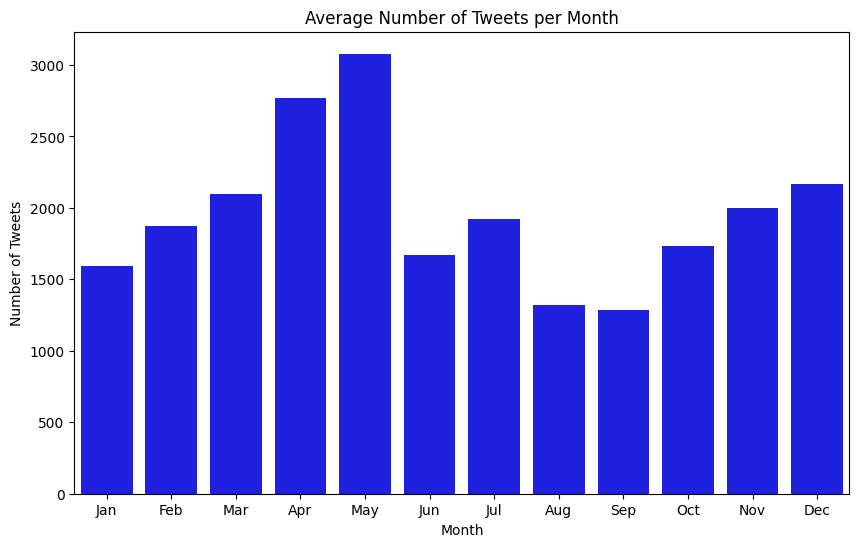

In [28]:
# Extract month from date column
bd_tw['month'] = bd_tw['date'].dt.month
# Calculate tweet counts for each month
monthly_tweets = bd_tw['month'].value_counts().sort_index()

# Generate the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_tweets.index, y=monthly_tweets.values, color='b')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Average Number of Tweets per Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [29]:
# Get a Series with usernames as index and their counts as values
username_counts = bd_tw['usernames'].value_counts()

# Convert the Series to a DataFrame for better visualisation
username_counts_df = username_counts.reset_index()

# Rename the columns for clarity
username_counts_df.columns = ['usernames', 'count']

# Display the DataFrame
print(username_counts_df)


                                         usernames  count
0                                   @wholemarsblog    331
1                                        @billym2k    276
2                                   @teslaownerssv    183
3                                  @erdayastronaut    126
4                                        @ppathole    122
...                                            ...    ...
9967  @doge_southern,@truth_tesla,@consumerreports      1
9968                                    @sluigi123      1
9969                     @cmuratori,@id_aa_carmack      1
9970                       @tesla4k,@matanmazursky      1
9971                                    @jonlovett      1

[9972 rows x 2 columns]


In [30]:
bd_tw['year'] = bd_tw['date'].dt.year

# Group by year and username, count the number of occurrences of each pair
username_counts_year = bd_tw.groupby(['year', 'usernames']).size()

In [32]:
# Iterate over each year and print the top usernames
for year in bd_tw['year'].unique():
    top_usernames = username_counts_year[year].nlargest(10)
    print(f"Top usernames for year {year}:")
    print(top_usernames)
    print()# Iterate over each year and print the top usernames
for year in bd_tw['year'].unique():
    top_usernames = username_counts_year[year].nlargest(10)
    print(f"Top usernames for year {year}:")
    print(top_usernames)
    print()

Top usernames for year 2023:
usernames
@billym2k           97
@cb_doge            96
@wallstreetsilv     66
@wholemarsblog      59
@thebabylonbee      47
@trungtphan         43
@kanekoathegreat    42
@alx                41
@dogeofficialceo    41
@teslaownerssv      41
dtype: int64

Top usernames for year 2022:
usernames
@wholemarsblog    152
@billym2k         138
@teslaownerssv     59
@rainmaker1973     51
@evafoxu           43
@ppathole          41
@pmarca            39
@sawyermerritt     37
@stillgray         36
@lexfridman        31
dtype: int64

Top usernames for year 2021:
usernames
@wholemarsblog      96
@teslaownerssv      45
@billym2k           41
@ppathole           37
@erdayastronaut     26
@rainmaker1973      26
@lexfridman         24
@thesheetztweetz    23
@engineers_feed     22
@cleantechnica      21
dtype: int64

Top usernames for year 2020:
usernames
@flcnhvy           58
@teslarati         48
@cleantechnica     45
@erdayastronaut    44
@ppathole          41
@thirdrowtes

KeyError: 2010

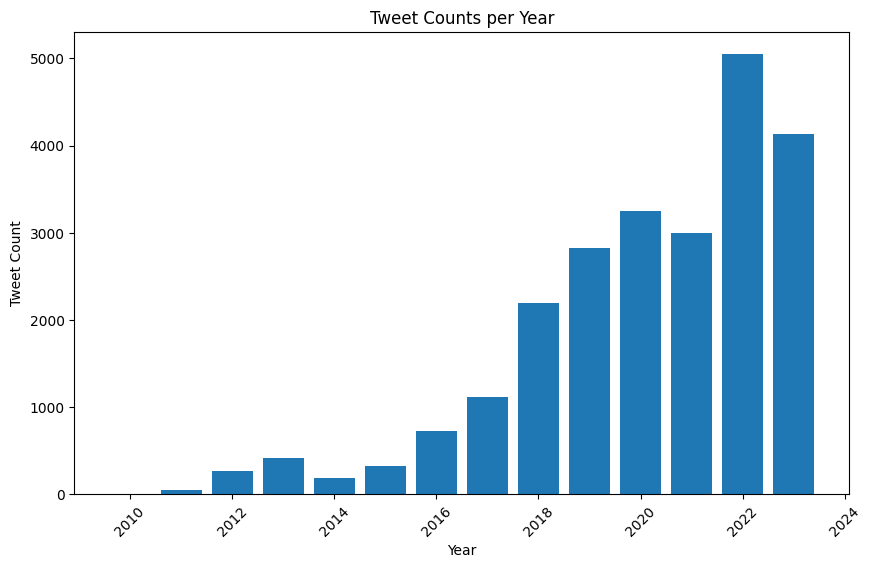

In [33]:
# Group by year and count the number of tweets per year
tweet_counts_per_year = bd_tw['year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(tweet_counts_per_year.index, tweet_counts_per_year.values)
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts per Year')
plt.xticks(rotation=45)
plt.show()

## Sentiment Analysis

For this part of the work, I would like to acknowledge and cite the previous work conducted by my professor Fernanda Durand.

"... but what if we don't have labels?"

Using the libraries shown in her course, we will measure the following:

##### Subjectivity

We will utilize the TextBlob library, which assigns values between [0, 1]. A value closer to 0 indicates factual information, while a value closer to 1 represents a personal opinion.

To provide a potentially more accurate interpretation of Elon's communication, we will manually assign margins for this measure. Our goal is to focus on tweets that closely align with Elon's personal opinions (=> 0.501).

The intention is to subset the tweets that best reflect Elon's opinions, rather than repetitive facts. I understand that this approach requires detailed consideration to optimize the results, but it is chosen to reduce the computational workload for emotion labeling.

##### Emotion

We will employ the Distilbert-base-uncased-emotion model, which has been fine-tuned using the HuggingFace Trainer and dataset. The tweets will be labeled with the perceived emotion from the following categories: Sadness, Joy, Love, Anger, Fear, Surprise.

The model's performance metrics are as follows:

Accuracy: 93.8

F1 Score: 93.79

Test Samples per Second: 398.69



### Testing

In [111]:
# Set the seed for random number generation
random.seed(200)

rand_row = random.randint(0, len(bd_tw))

# Print the 'text' column
text_value = bd_tw.loc[rand_row, 'text']
print("Text:", text_value)
print()

# Print the 'preprocessed_text' column
preprocessed_text_value = bd_tw.loc[rand_row, 'preprocessed_text']
print("Preprocessed Text:", preprocessed_text_value)
print()

# Print the 'lemmatized_text' column
lemmatized_text_value = bd_tw.loc[rand_row, 'lemmatized_text']
print("Lemmatized Text:", lemmatized_text_value)
print()


Text: the bbc interview last week was exceptional in illustrating why you cannot rely on the media for truth

Preprocessed Text: bbc interview last week exceptional illustrating rely media truth

Lemmatized Text: bbc interview last week exceptional illustrating rely medium truth



In [112]:
### TextBlob
# Calculate and print subjectivity and polarity for 'lemmatized_text' column
text_blob_lemmatized = TextBlob(lemmatized_text_value)
subjectivity_lemmatized = text_blob_lemmatized.sentiment.subjectivity

polarity_lemmatized = text_blob_lemmatized.sentiment.polarity


print("Lemmatized Text:",lemmatized_text_value)

print()
print("Subjectivity:", subjectivity_lemmatized)
print()
print("Polarity:", polarity_lemmatized)
print()


##SEED TESTING

#1: Subjectivity: 1.0, 'surprise', 'score': 0.764474093914032
#42 es igual
#43 es igual
#44 es diferente (mejor ejemplo)


Lemmatized Text: bbc interview last week exceptional illustrating rely medium truth

Subjectivity: 0.5333333333333333

Polarity: 0.3333333333333333



In [43]:
# Distilbert

specific_model = pipeline(model="bhadresh-savani/distilbert-base-uncased-emotion")
print("lemmatized_text_value")
print(specific_model(lemmatized_text_value))
print()


#print()

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


lemmatized_text_value
[{'label': 'joy', 'score': 0.9351598024368286}]



## Data frame modeling

### Subseting using subjectivity 

Library: TextBlob

Condition: Subjectivity per twit => 0.501

##### Findings:

Twits that subjectivity >= 0.501: 6700 rows


In [71]:
# Create a new column 'subjectivity_score' in bd_tw 
bd_tw['subjectivity_score'] = bd_tw['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Create a subset of rows where subjectivity is greater than or equal to 0.501
#subset_bd_tw = bd_tw[bd_tw['subjectivity_score'] >= 0.501]

In [72]:
bd_tw.tail(1)

#subset_bd_tw.shape

,date,text,text_length,preprocessed_text,lemmatized_text,usernames,emoji,hour,month,year,subjectivity_score
23500,2010-06-04,"please ignore prior tweets, as that was someon...",92,please ignore prior tweets someone pretending...,please ignore prior tweet someone pretend actu...,NaN,,18,6,2010,0.05


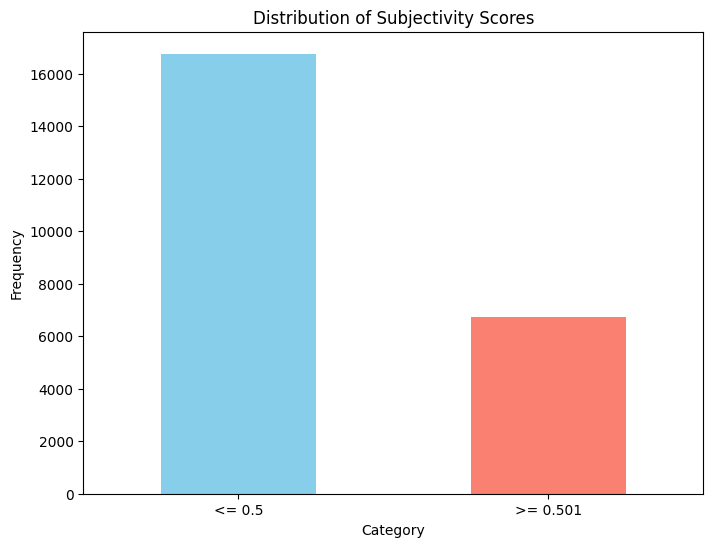

In [75]:
import seaborn as sns

# Create a new column to categorize the data
bd_tw['category'] = ['>= 0.501' if x >= 0.501 else '<= 0.5' for x in bd_tw['subjectivity_score']]

value_counts = bd_tw['category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title(' High Subjectivity Subset')
plt.xticks(rotation=0)
plt.show()


### Asigning a sentiment label

Library: Distilbert

In [46]:
# Define the specific model
##specific_model = pipeline(model="bhadresh-savani/distilbert-base-uncased-emotion")

# Create new columns 'label' and 'score' in subset_bd_tw DataFrame
##subset_bd_tw['label'] = subset_bd_tw['lemmatized_text'].apply(lambda x: specific_model(x)[0]['label'])
##subset_bd_tw['score'] = subset_bd_tw['lemmatized_text'].apply(lambda x: specific_model(x)[0]['score'])

In [47]:
##Download the csv

#subset_bd_tw.to_csv('subset_bd_tw.csv', index=False)


#### notes:

    -I had to comment some of our modeling code while working in the notebook as a whole
    - Modeled df saved in repository

### TF-IDF

Additionally im going to use a TF-IDF vectorizer to get the top representative words found in Elon Musk's tweets. 

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming subset_bd_tw_1 is your DataFrame
tweets = subset_bd_tw_1['lemmatized_text']

# Create the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the lemmatized tweets
X = vectorizer.fit_transform(tweets)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()


In [49]:
# Get the top words with the highest tf-idf score
import numpy as np
top_n = 20
indices = np.argsort(vectorizer.idf_)[::-1]
top_features = [(feature_names[i], vectorizer.idf_[i]) for i in indices[:top_n]]

for feature, score in top_features:
    print(f"Word: {feature}, TF-IDF score: {score}")


Word: zx, TF-IDF score: 9.122816380293493
Word: eruption, TF-IDF score: 9.122816380293493
Word: equation, TF-IDF score: 9.122816380293493
Word: passage, TF-IDF score: 9.122816380293493
Word: equatorial, TF-IDF score: 9.122816380293493
Word: equip, TF-IDF score: 9.122816380293493
Word: partsprophetsprofits, TF-IDF score: 9.122816380293493
Word: partnership, TF-IDF score: 9.122816380293493
Word: equivalent, TF-IDF score: 9.122816380293493
Word: partisan, TF-IDF score: 9.122816380293493
Word: equus, TF-IDF score: 9.122816380293493
Word: ergen, TF-IDF score: 9.122816380293493
Word: erode, TF-IDF score: 9.122816380293493
Word: particle, TF-IDF score: 9.122816380293493
Word: erotic, TF-IDF score: 9.122816380293493
Word: parse, TF-IDF score: 9.122816380293493
Word: eternity, TF-IDF score: 9.122816380293493
Word: es, TF-IDF score: 9.122816380293493
Word: paribus, TF-IDF score: 9.122816380293493
Word: espouse, TF-IDF score: 9.122816380293493


# 5. Results and Insights visualizations

### Overview:

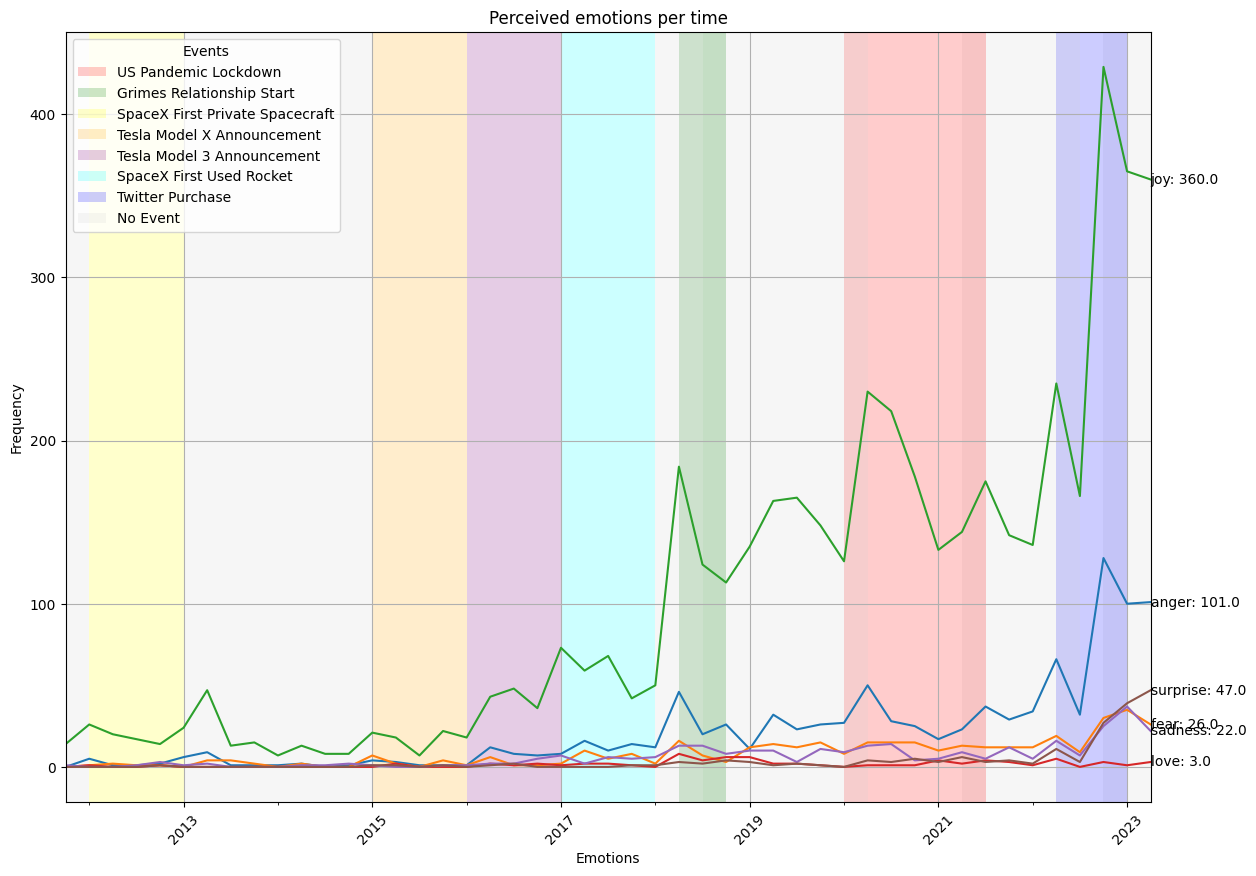

In [119]:
# Group the data by semesters
subset_bd_tw_1['date'] = pd.to_datetime(subset_bd_tw_1['date'])
subset_bd_tw_1['demester'] = subset_bd_tw_1['date'].dt.to_period('Q')
grouped_data = subset_bd_tw_1.groupby(['demester', 'label']).size().unstack().fillna(0)

# Set the figure size
plt.rcParams['figure.figsize'] = (14, 10)

# Plot the line plot without dots
grouped_data.plot.line(marker='')

# Customize the plot
plt.title('Perceived emotions per time')
plt.xlabel('Emotions')
plt.ylabel('Frequency')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a background grid

# Remove the legend box
plt.legend().remove()

# Label each line at the end of the plot
for line in grouped_data.columns:
    x = grouped_data.index[-1]
    y = grouped_data[line].values[-1]
    label = f'{line}: {y}'
    plt.text(x, y, label, ha='left', va='center')

# Define custom event colors
event_colors = {
    'US Pandemic Lockdown': 'red',
    'Grimes Relationship Start': 'green',
    'SpaceX First Private Spacecraft': 'yellow',
    'Tesla Model X Announcement': 'orange',
    'Tesla Model 3 Announcement': 'purple',
    'SpaceX First Used Rocket': 'cyan',
    'Twitter Purchase': 'blue',
    'No Event': 'lightgray'  # Custom color for "No event" label
}

# Assign custom colors to events
event_periods = subset_bd_tw_1[['demester', 'event']].drop_duplicates()
event_periods['demester'] = event_periods['demester'].dt.to_timestamp()
for idx, row in event_periods.iterrows():
    facecolor = event_colors.get(row['event'], 'lightgray')  # Assign custom color or default to 'lightgray'
    plt.axvspan(row['demester'], row['demester'] + pd.DateOffset(months=3),
                facecolor=facecolor, alpha=0.2)

# Create a legend box for events
handles = []
labels = []
for event, color in event_colors.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.2))
    labels.append(event)
plt.legend(handles, labels, title='Events', loc='upper left')

# Show the plot
plt.show()




In this plot, we can observe that Elon's main perceived emotion in his tweets is joy. I think it's very interesting how the joy and anger lines exhibit notable patterns in specific situations.

For example, we can argue that his behavior tends to become a little nervous during important business announcements, or that he lost some joy at the beginning of his relationship with Grimes.

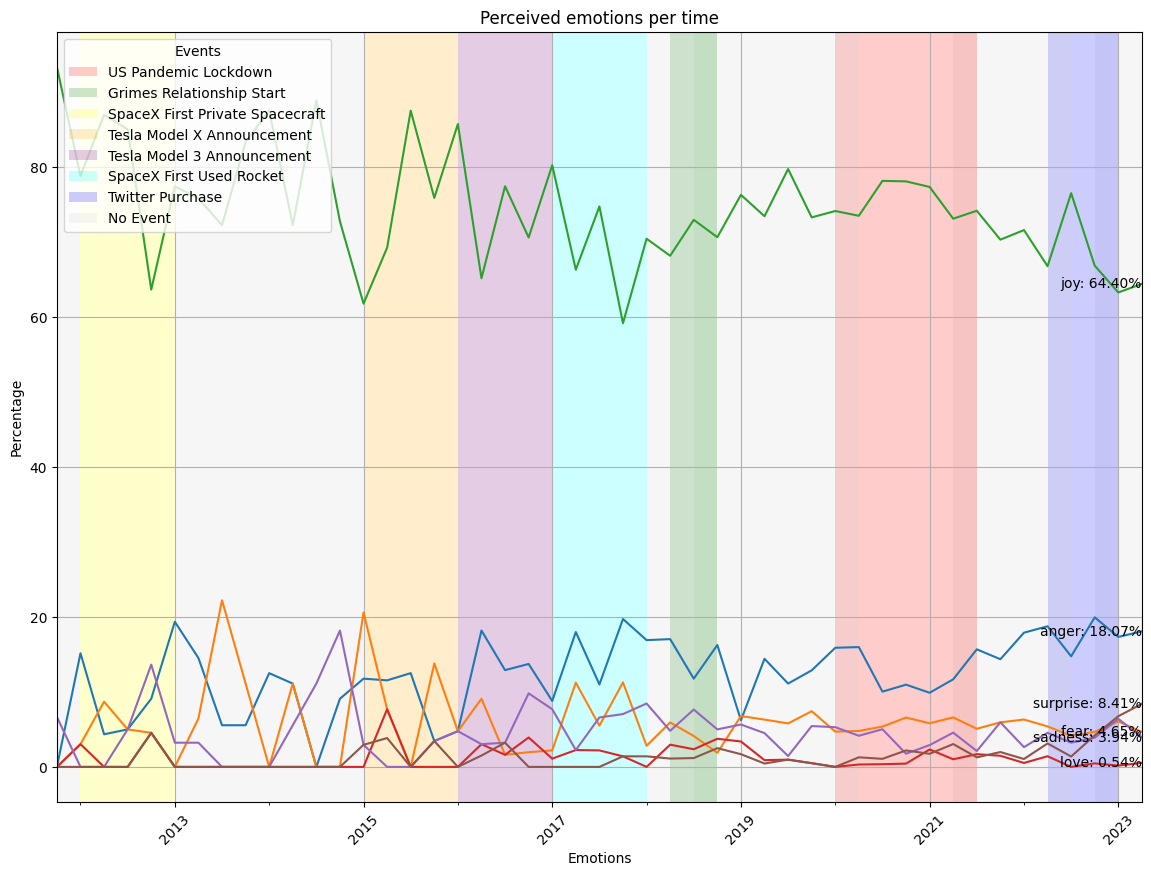

In [123]:
# Group the data by semesters
subset_bd_tw_1['date'] = pd.to_datetime(subset_bd_tw_1['date'])
subset_bd_tw_1['demester'] = subset_bd_tw_1['date'].dt.to_period('Q')
grouped_data = subset_bd_tw_1.groupby(['demester', 'label']).size().unstack().fillna(0)

# Calculate the total frequency for each semester
grouped_data['total'] = grouped_data.sum(axis=1)

# Calculate the percentage distribution of each label within each semester
for col in grouped_data.columns[:-1]:  # Exclude 'total' column
    grouped_data[col] = grouped_data[col] / grouped_data['total'] * 100

grouped_data = grouped_data.drop(columns='total')  # Drop 'total' column

# Set the figure size
plt.rcParams['figure.figsize'] = (14, 10)

# Plot the line plot without dots
grouped_data.plot.line(marker='')

# Customize the plot
plt.title('Perceived emotions per time')
plt.xlabel('Emotions')
plt.ylabel('Percentage')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a background grid

# Remove the legend box
plt.legend().remove()

# Label each line at the end of the plot
for line in grouped_data.columns:
    x = grouped_data.index[-1]
    y = grouped_data[line].values[-1]
    label = f'{line}: {y:.2f}%'
    plt.text(x, y, label, ha='right', va='center')

# Define custom event colors
event_colors = {
    'US Pandemic Lockdown': 'red',
    'Grimes Relationship Start': 'green',
    'SpaceX First Private Spacecraft': 'yellow',
    'Tesla Model X Announcement': 'orange',
    'Tesla Model 3 Announcement': 'purple',
    'SpaceX First Used Rocket': 'cyan',
    'Twitter Purchase': 'blue',
    'No Event': 'lightgray'  # Custom color for "No event" label
}

# Assign custom colors to events
event_periods = subset_bd_tw_1[['demester', 'event']].drop_duplicates()
event_periods['demester'] = event_periods['demester'].dt.to_timestamp()
for idx, row in event_periods.iterrows():
    facecolor = event_colors.get(row['event'], 'lightgray')  # Assign custom color or default to 'lightgray'
    plt.axvspan(row['demester'], row['demester'] + pd.DateOffset(months=3),
                facecolor=facecolor, alpha=0.2)

# Create a legend box for events
handles = []
labels = []
for event, color in event_colors.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.2))
    labels.append(event)
plt.legend(handles, labels, title='Events', loc='upper left')

# Show the plot
plt.show()


By using percentages, we normalize the data to make comparisons between time periods more meaningful. But we also lose the capacity to interpret "silence".

Still in this graph we can see exactly when some of the less frequent emotions are more triggered in certaint events

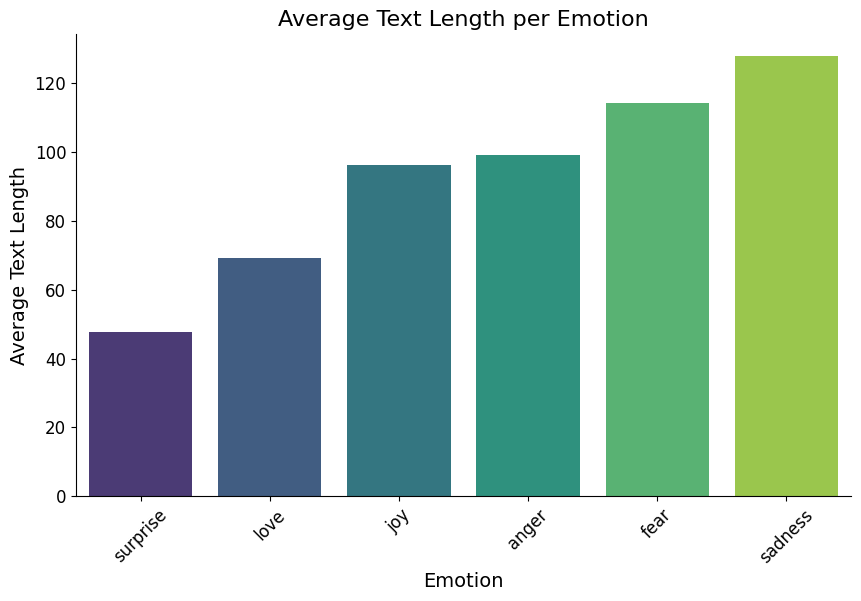

In [118]:
# Calculate the average text_length for each label
avg_text_length = subset_bd_tw_1.groupby('label')['text_length'].mean()

# Sort the data
avg_text_length = avg_text_length.sort_values()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a barplot
sns.barplot(x=avg_text_length.index, y=avg_text_length.values, palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Average Text Length per Emotion', fontsize=16)
ax.set_xlabel('Emotion', fontsize=14)
ax.set_ylabel('Average Text Length', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# Show the plot
plt.show()

Now, in this plot we can see how his tweets tend to get bigger for "negative" emotions, we can say that Elon feels confortable speaking his mind.

#### Usernames


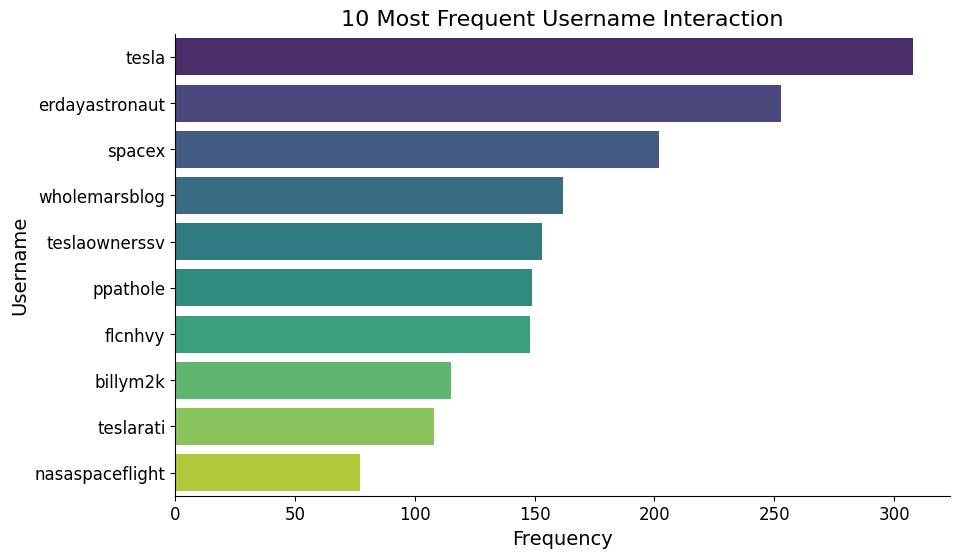

In [57]:
# Get the top 10 most frequent usernames
top_usernames = username_df['username'].value_counts().nlargest(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart with a palette
sns.barplot(y=top_usernames.index, x=top_usernames.values, palette="viridis", ax=ax)

# Customize the plot
ax.set_title('10 Most Frequent Username Interaction', fontsize=16)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Username', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# Show the plot
plt.show()


Elon seems to choose to use his plataform to interact with his own business

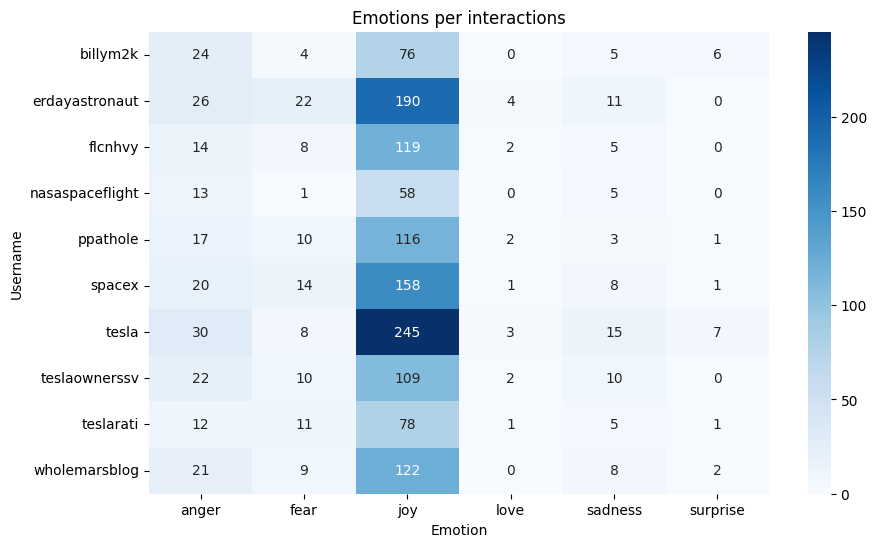

In [117]:
# Select the top 10 most frequent usernames
top_usernames = username_df['username'].value_counts().head(10)

# Filter the DataFrame for the top usernames
df_top_usernames = username_df[username_df['username'].isin(top_usernames.index)]

# Create a pivot table of the frequency of each username per label
heatmap_data = df_top_usernames.pivot_table(index='username', columns='label', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Emotion')
plt.ylabel('Username')
plt.title('Emotions per interactions')
plt.show()

While most of the interactions seem to be quite positive, it seems someone is running good marketing campaigns

#### Most representative words with TF-IDF

We used TF-IDF to get a look on what are the most representative words in Elons tweets, while also making sure these make sense on the context of each emotion "label"

Everything looks acceptable for now.

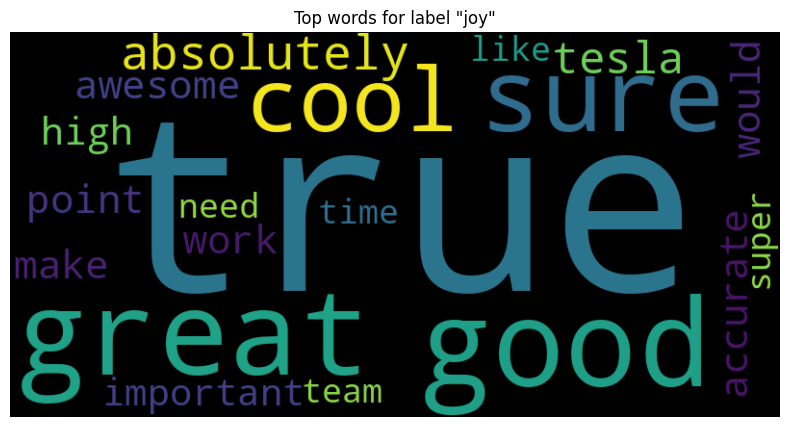

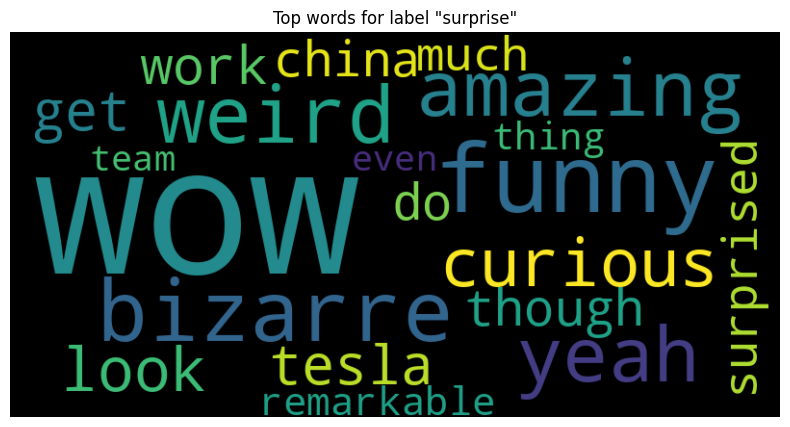

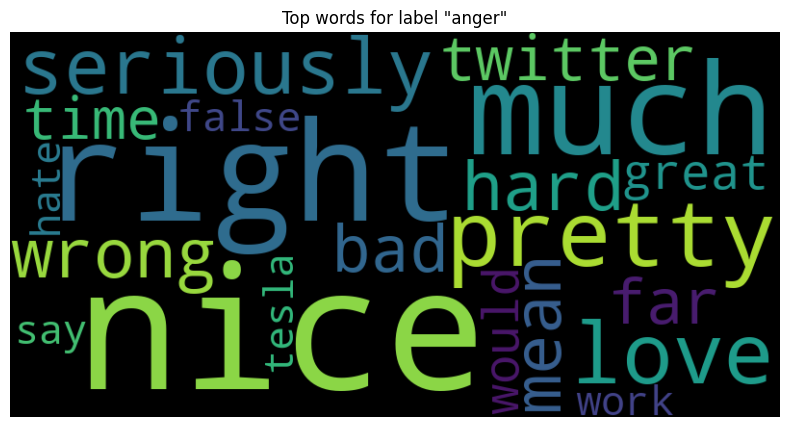

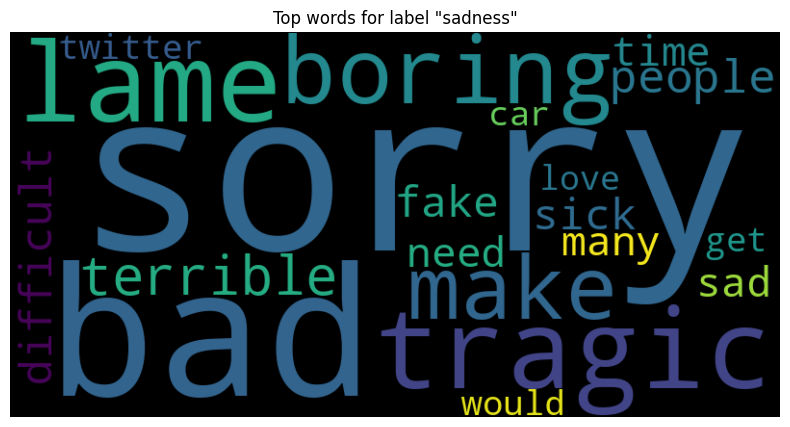

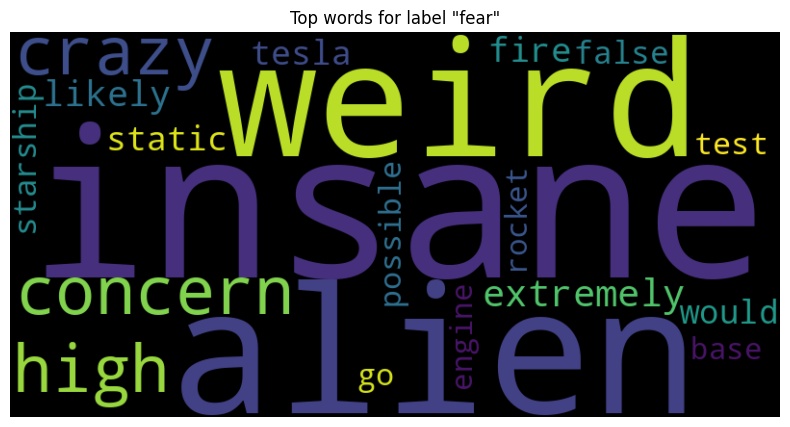

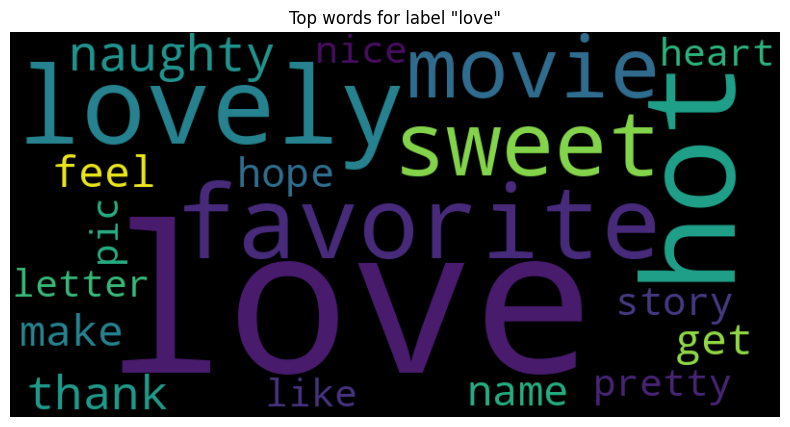

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique labels in the dataset
labels = subset_bd_tw_1['label'].unique()

# For each label, compute TF-IDF, get top words and create word cloud
for label in labels:
    # Subset the dataframe by label
    df_subset = subset_bd_tw_1[subset_bd_tw_1['label'] == label]
    
    # Compute TF-IDF on the subset dataframe
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df_subset['lemmatized_text'])
    
    # Get the feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get top N words with the highest tf-idf score
    top_n = 20
    mean_tfidf = X.mean(axis=0).A1
    top_indices = np.argsort(mean_tfidf)[::-1][:top_n]
    top_words = {feature_names[i]: mean_tfidf[i] for i in top_indices}
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(top_words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top words for label "{label}"')
    plt.show()


In [61]:
# Create a new column 'emoji' and initialize it as empty
bd_tw['emoji'] = ''

# Iterate over each row in the DataFrame
for index, row in bd_tw.iterrows():
    text = row['text']
    emojis = re.findall(emoji_pattern, text)
    unique_emojis = set(emojis)
    bd_tw.at[index, 'emoji'] = ' '.join(unique_emojis)

# Count the occurrences of each emoji
emoji_counts = bd_tw['emoji'].str.split(expand=True).stack().value_counts()

# Print the most appeared emojis
print("Top appeared emojis:")
print(emoji_counts.head())

Top appeared emojis:
🤣     545
🤣🤣    364
💯     124
🔥🔥     78
🔥      56
dtype: int64
